<a href="https://colab.research.google.com/github/Koushikgoud/Deep-Learning/blob/main/BinaryClassifierNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Import required libraries**
1.  `pandas` and `numpy`: Libraries for data manipulation and analysis. They provide data structures for efficiently storing and working with data in Python, as well as powerful tools for working with arrays, matrices, and other numerical data.

1.  `torch`, `torch.nn`, and `torch.optim`: A deep learning framework and its sub-libraries for building and training neural networks. They provide a variety of tools for working with tensors, implementing various neural network architectures, and optimizing model parameters.

1.   `Dataset` and `DataLoader`: PyTorch classes that provide an interface for accessing and iterating over batches of samples in a dataset. They can be used to efficiently load and preprocess data in parallel during training.

2.   `StandardScaler`, `load_breast_cancer`, and `train_test_split`: Functions from the sklearn.preprocessing, sklearn.datasets, and sklearn.model_selection modules, respectively, that can be used for standardizing input data, loading the Breast Cancer Wisconsin dataset, and splitting a dataset into training and testing subsets.

2.   `confusion_matrix`, `accuracy_score`, and `precision_recall_fscore_support`: Functions from the sklearn.metrics module that can be used to compute evaluation metrics like confusion matrices, accuracy, precision, recall, and F1 score for a classification model.

1.  `matplotlib.pyplot` and `seaborn`: Libraries for data visualization in Python. They provide tools for creating various types of plots and visualizations, and can be useful for visualizing the results and gaining insights into the data.


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns



1.   First, the URL of the dataset and the column names are defined.

1.   Then, the dataset is loaded using the `pandas` library's `read_csv()` function with the `header=None` parameter indicating that there are no column headers in the data file.
1.   The `names` parameter is set to `column_names` list to add the column names to the dataframe.

1.   The `na_values` parameter is set to `'?'` to replace any missing values in the data with `NaN`.
2.   The rows with `NaN` values are dropped using the `dropna()` method.

2.   The `id` column is dropped using the `drop()` method since it does not provide any useful information for the modeling process.

2.   The features (`X`) and target (`y`) variables are extracted from the dataframe using `iloc`.

2.   The target variable is mapped to binary values of 0 and 1 where `2` is mapped to `0` and `4` is mapped to `1` using the `astype()` method.











In [ ]:
 # Load data

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
column_names = [
    'id', 'clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape',
    'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei',
    'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'
]

df = pd.read_csv(data_url, header=None, names=column_names, na_values='?')
df.dropna(inplace=True)  # Drop rows with missing values
df.drop(columns=['id'], inplace=True)  # Drop the 'id' column

X = df.iloc[:, :-1].values
y = (df.iloc[:, -1].values == 4).astype(int)  # Map class values to 0 and 1 (2 -> 0, 4 -> 1)


This code visualizes the dataset by creating histograms of each feature in the dataset using `matplotlib`.


1.   First, a list of feature names is defined to be used as the column names for the `df_visualize` dataframe.
1.   The `X` variable (which contains the feature values) is used to create a new dataframe (`df_visualize`) with the feature names as column names.
2.   Then, the `hist()` method is called on the `df_visualize` dataframe to create histograms of each feature.
2.   The `figsize` parameter is set to `(14, 14)` to make the plot larger.
Finally, `plt.show()` is called to display the histograms.







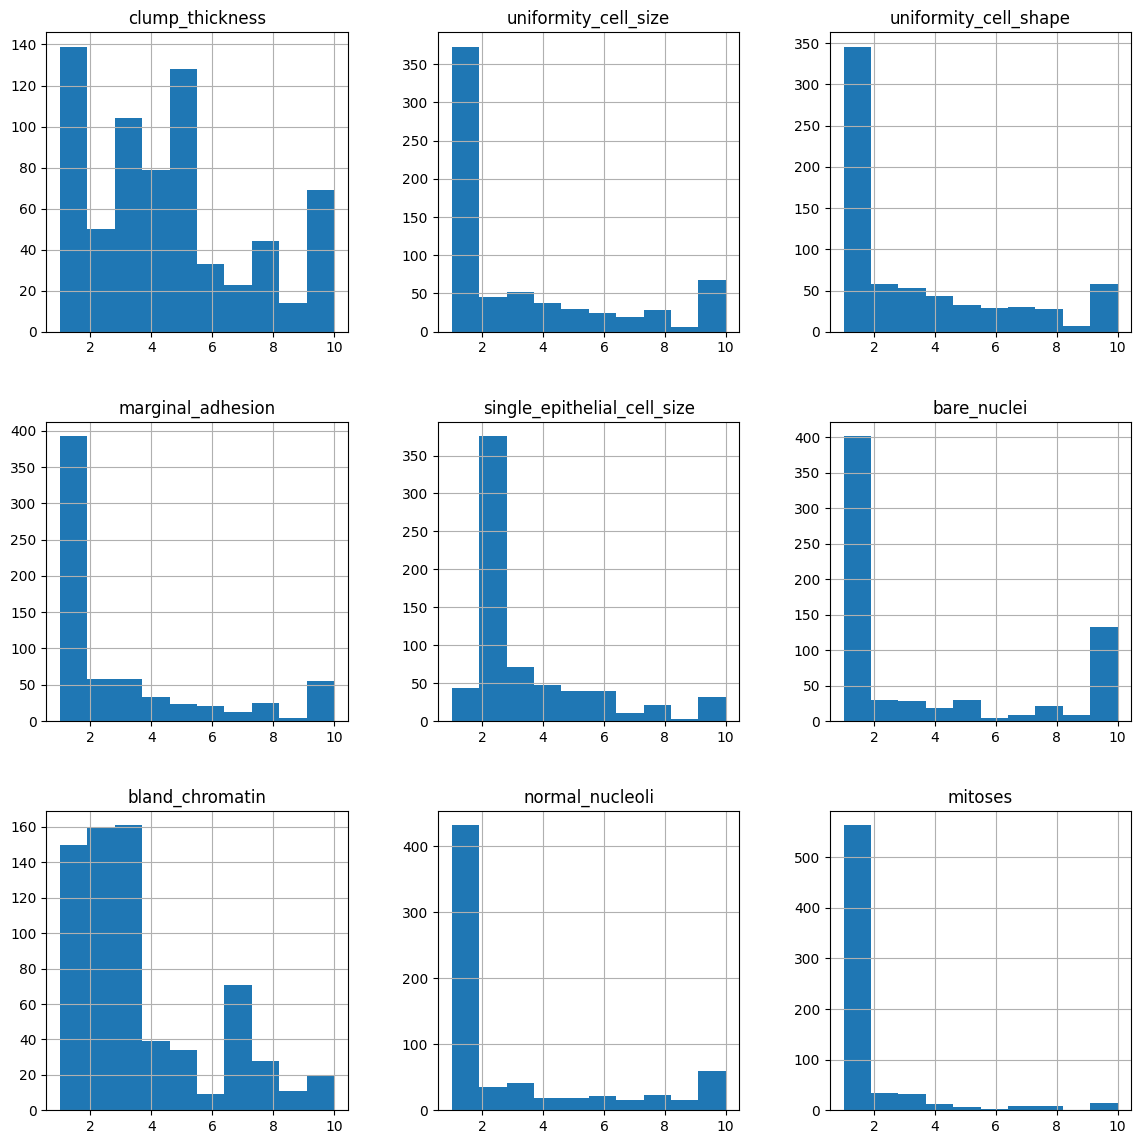

In [ ]:
# Visualize the dataset
import matplotlib.pyplot as plt

feature_names = [
    'clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape',
    'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei',
    'bland_chromatin', 'normal_nucleoli', 'mitoses'
]

df_visualize = pd.DataFrame(X, columns=feature_names)
df_visualize.hist(figsize=(14, 14))
plt.show()

The heatmap is used to visualize the correlation matrix of the input features in the Breast Cancer Wisconsin dataset.

A correlation matrix is a matrix that shows the correlation coefficients between pairs of variables. In this case, the correlation matrix shows the pairwise correlation coefficients between the input features in the dataset. The values in the matrix range from -1 to 1, with 1 indicating a perfect positive correlation (i.e., the two variables increase or decrease together), 0 indicating no correlation, and -1 indicating a perfect negative correlation (i.e., one variable increases as the other decreases).


`sns.heatmap(df.corr(), annot=True, cmap="coolwarm")`: Creates a heatmap plot of the correlation matrix of the features in the DataFrame `df`, using `seaborn`. The values in the correlation matrix range from -1 to 1, and are color-coded using the `coolwarm` colormap. The `annot=True` argument displays the correlation values in each cell of the heatmap

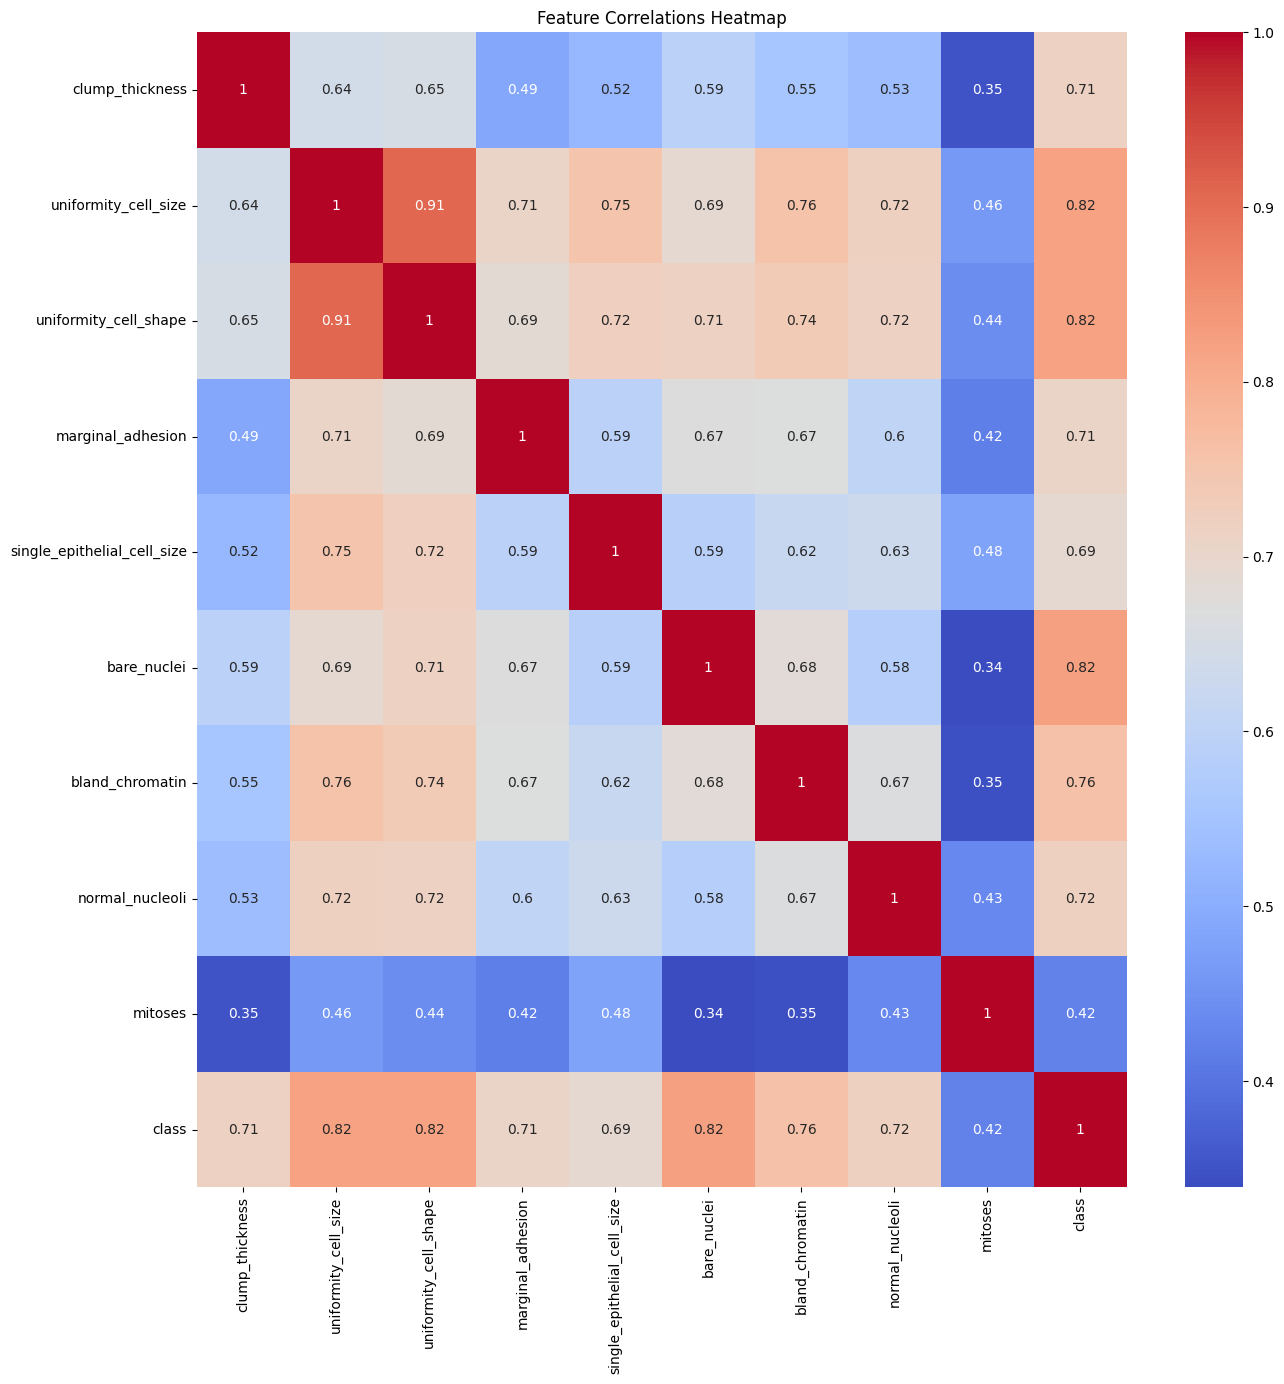

In [ ]:
# Heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations Heatmap")
plt.show()

A pairplot, or scatterplot matrix, is a plot that shows scatterplots between all possible pairs of variables in a dataset. In this case, the pairplot is used to visualize the pairwise relationships between a subset of the input features in the Breast Cancer Wisconsin dataset.


`sns.pairplot(df.iloc[:, :5])`: Creates a scatterplot matrix of a subset of the input features in the Breast Cancer Wisconsin dataset, using `seaborn`. The `iloc[:, :5]` notation selects only the first 5 columns of the DataFrame `df`, which corresponds to the first 5 input features in the dataset.

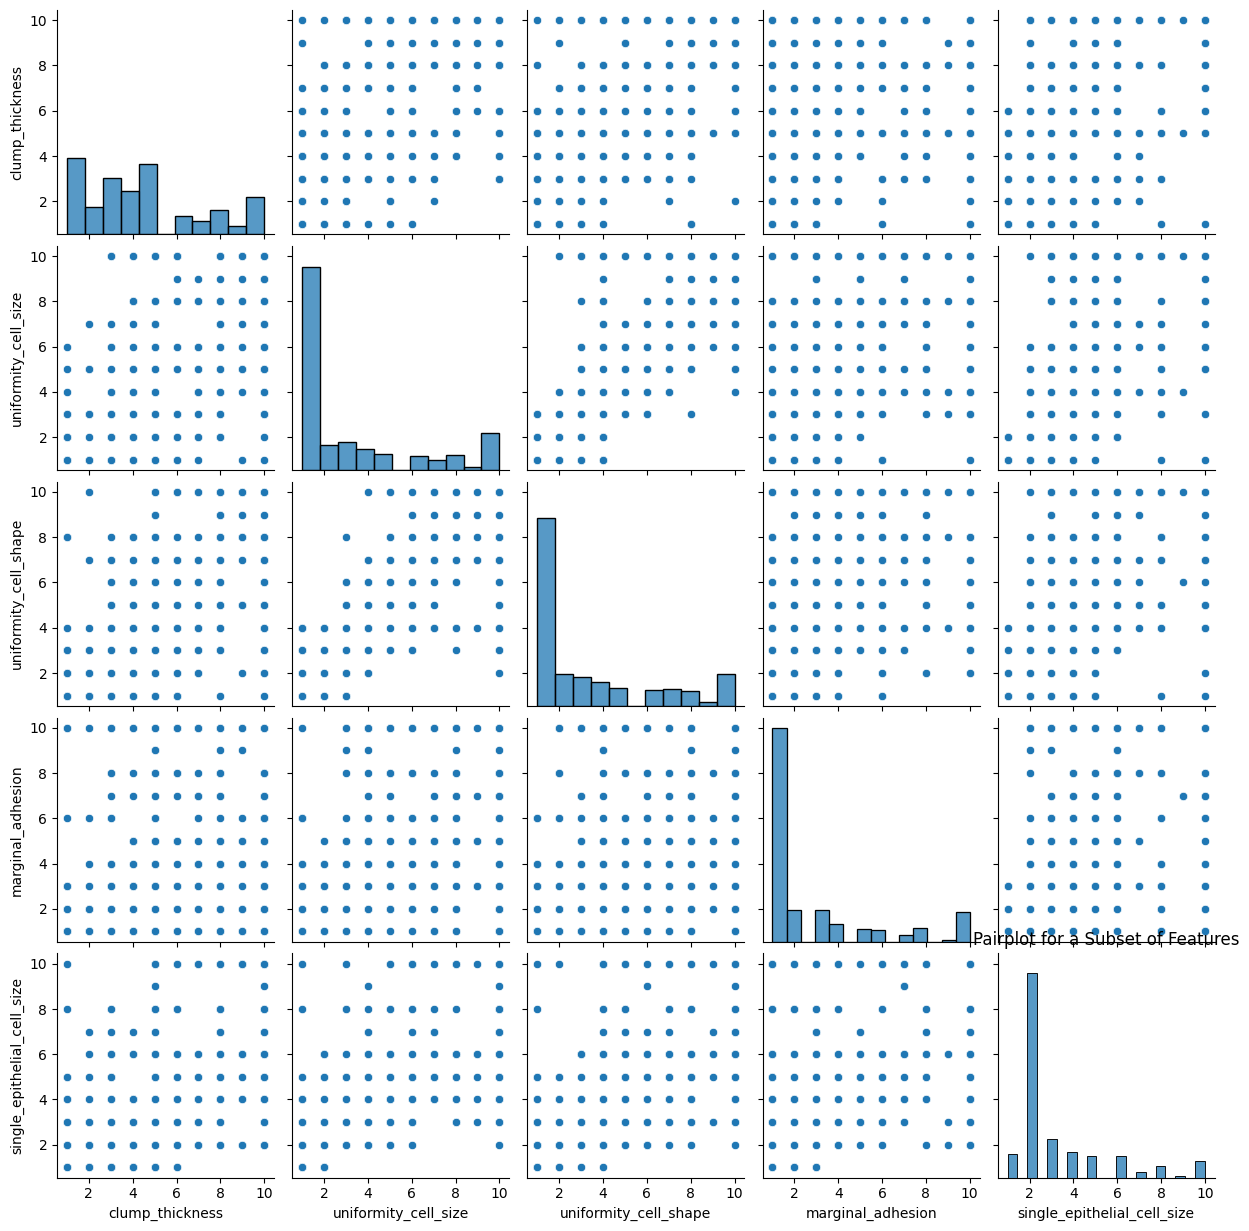

In [ ]:
# Pairplot (scatterplot matrix) for a subset of features to save computation time
sns.pairplot(df.iloc[:, :5])  # Using only the first 5 features for the pairplot
plt.title("Pairplot for a Subset of Features")
plt.show()

 

*   `scaler = StandardScaler()`: Creates an instance of the `StandardScaler`class from `sklearn.preprocessing`, which is used to standardize the input features by removing the mean and scaling to unit variance.
*   `X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)`: Splits the standardized input features and the target labels into training and testing sets, using `sklearn.model_selection.train_test_split`. The testing set contains 10% of the data, and the random seed is set to 42 for reproducibility.

*   `class BreastCancerDataset(Dataset)`: Defines a custom PyTorch Dataset class for the Breast Cancer Wisconsin dataset. The class takes as input the input features X and the target labels y, and returns a tuple (x, y) for each sample.

*   `train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)`: Creates a PyTorch `DataLoader` object for the training set, which allows us to efficiently load and preprocess the data in batches during training. The `batch_size` argument specifies the number of samples to load at once, and the shuffle argument specifies whether to `shuffle` the order of the samples during training.

*   `test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)`: Creates a PyTorch `DataLoader` object for the testing set, using the same batch size and disabling shuffling.






In [ ]:
# Standardize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

class BreastCancerDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create dataset objects for train and test sets
train_dataset = BreastCancerDataset(X_train, y_train)
test_dataset = BreastCancerDataset(X_test, y_test)

# Create DataLoaders for train and test sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

The `LinearModel` class is a custom PyTorch module that defines a linear neural network with two fully connected (linear) layers for binary classification of the Breast Cancer Wisconsin dataset. Here's a step-by-step breakdown of the code:

1.   `self.fc1 = nn.Linear(9, 4)`: This line creates the first fully connected layer of the network, which takes in 9 input features (corresponding to the 9 standardized input features in the dataset) and produces 4 output features. Each output feature is a weighted sum of the input features, with the weights learned during training.

1.   `self.fc2 = nn.Linear(4, 1)`: This line creates the second fully connected layer of the network, which takes in 4 input features (the 4 output features from the first layer) and produces a single output feature. Again, this output feature is a weighted sum of the input features, with the weights learned during training.

2.   `x = torch.relu(self.fc1(x))`: This line applies the ReLU activation function to the output of the first fully connected layer. ReLU is a non-linear activation function that sets negative values to 0 and leaves positive values unchanged. This introduces non-linearity into the network, which is necessary for modeling complex patterns in the data.

1.   `x = torch.sigmoid(self.fc2(x))`: This line applies the sigmoid activation function to the output of the second fully connected layer. Sigmoid is a non-linear activation function that maps the output of the layer to a value between 0 and 1, which can be interpreted as the probability of the sample belonging to the positive class (i.e., having breast cancer).

2.   `return x.squeeze()`: This line returns the output of the network, after removing any dimensions of size 1 using the squeeze method. The output is a single scalar value representing the probability of the sample belonging to the positive class.






In [ ]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.fc1 = nn.Linear(9, 4)  # First fully connected layer with 8 neurons
        self.fc2 = nn.Linear(4, 1)   # Second fully connected layer with 1 neuron

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation function on the output of first layer
        x = torch.sigmoid(self.fc2(x))  # Apply sigmoid activation function on the output of second layer
        return x.squeeze()



1.   `model = LinearModel()`: Instantiates an instance of the LinearModel class.

1.   `criterion = nn.BCELoss()`: Creates an instance of the `BCELoss` class from PyTorch's `nn` module, which is a binary cross-entropy loss function. This loss function is commonly used for binary classification problems, as it measures the difference between the predicted probabilities and the true binary labels.

2.   `optimizer = optim.Adam(model.parameters(), lr=0.005)`: Creates an instance of the `Adam` optimizer from PyTorch's `optim` module, which is an adaptive learning rate optimization algorithm that works well for a wide range of deep learning problems. The `model.parameters()` argument specifies that the optimizer should update the weights of the model during training, and the `lr` argument sets the learning rate to 0.001, which determines the step size of the optimizer during training.



In [ ]:
# Instantiate the model, loss function, and optimizer
model = LinearModel()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0025)



1.   `num_epochs = 400`: Specifies the number of epochs to train the model for. An epoch is one complete pass through the training dataset.


1.   `optimizer.zero_grad()`: Resets the gradients of the model parameters to zero, so that the optimizer can accumulate the gradients for the current batch only.

1.   `outputs = model(inputs)`: This line computes the output of the model for the current batch of inputs, using the `forward` method defined in the `LinearModel` class. The `outputs` tensor has a shape of `(batch_size, )`, where `batch_size` is the number of samples in the current batch.

1.   `loss.backward()`: This line computes the gradients of the loss with respect to the model parameters, using automatic differentiation.
2.   `optimizer.step()`: This line updates the model parameters (i.e., the weights) using the gradients that were computed in the previous step, using the `Adam` optimizer that was defined earlier.

2.   `print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')`: This provides a visual indicator of the training progress and can help diagnose any issues that arise during training.





In [ ]:

num_epochs = 400
loss_values = []  # Create an empty list to store loss values

for epoch in range(num_epochs):
    epoch_loss = 0  # Initialize epoch loss to zero
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Reset gradients to zero
        outputs = model(inputs)  # Forward pass to get outputs
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass to compute gradients
        optimizer.step()  # Update model parameters
        epoch_loss += loss.item()  # Accumulate the loss for this epoch
    
    epoch_loss /= len(train_loader)  # Calculate average loss for this epoch
    loss_values.append(epoch_loss)  # Append the average loss to the list
    
    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')


Epoch [20/400], Loss: 0.0822
Epoch [40/400], Loss: 0.0753
Epoch [60/400], Loss: 0.0670
Epoch [80/400], Loss: 0.0656
Epoch [100/400], Loss: 0.0640
Epoch [120/400], Loss: 0.0630
Epoch [140/400], Loss: 0.0623
Epoch [160/400], Loss: 0.0756
Epoch [180/400], Loss: 0.0652
Epoch [200/400], Loss: 0.0951
Epoch [220/400], Loss: 0.0618
Epoch [240/400], Loss: 0.0720
Epoch [260/400], Loss: 0.0571
Epoch [280/400], Loss: 0.0566
Epoch [300/400], Loss: 0.0561
Epoch [320/400], Loss: 0.0574
Epoch [340/400], Loss: 0.0549
Epoch [360/400], Loss: 0.0576
Epoch [380/400], Loss: 0.0562
Epoch [400/400], Loss: 0.0541


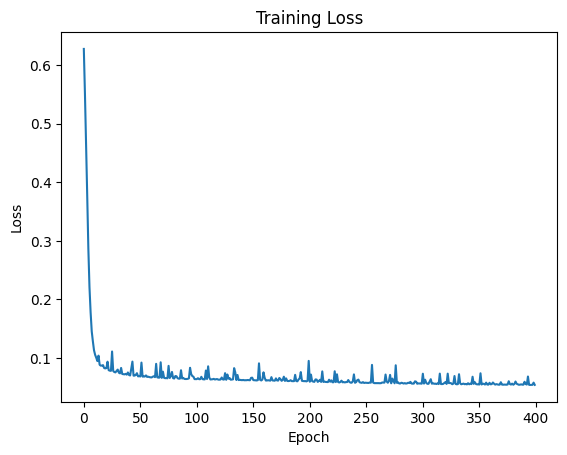

In [ ]:
# Plot the loss values
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

**Evaluation:**

1.   `model.eval()`: Sets the model to evaluation mode, which disables dropout and batch normalization layers, and sets the gradients to be untrackable (since we don't need to compute gradients during inference).

1.   `y_pred.extend(preds.tolist())` and `y_true.extend(labels.tolist())`: Extend the lists of predicted labels and true labels with the current batch of values, using the `extend` method. The `tolist()` method is used to convert the tensor values to Python lists, so that they can be concatenated with the existing lists.

At the end of the loop, the `y_pred` and `y_true` lists contain the predicted labels and true labels for all samples in the test set, respectively. These lists can be used to compute various evaluation metrics, such as accuracy, precision, recall, and F1 score.


In [ ]:
# Evaluate the model
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        preds = (outputs > 0.5).float()
        y_pred.extend(preds.tolist())
        y_true.extend(labels.tolist())

**Metrics calculation**
1.   `cm = confusion_matrix(y_true, y_pred)`: Computes the confusion matrix for the predicted labels and true labels, using the `confusion_matrix` function from scikit-learn. The confusion matrix is a table that summarizes the predicted and true binary labels, and is used to evaluate the performance of a classification model

1.   `acc = accuracy_score(y_true, y_pred)`: Computes the accuracy score for the predicted labels and true labels, using the `accuracy_score` function from scikit-learn. The accuracy score is the proportion of correct predictions out of all predictions, and is a commonly used evaluation metric for binary classification.

1.   `precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')`: Computes the precision, recall, and F1 score for the predicted labels and true labels, using the `precision_recall_fscore_support` function from scikit-learn. Precision is the proportion of true positives out of all positive predictions, recall is the proportion of true positives out of all true positives and false negatives, and F1 score is the harmonic mean of precision and recall.

1.   `tp = cm[0][0], fp = cm[0][1], fn = cm[1][0], tn = cm[1][1]`: Extracts the number of true positives (TP), false positives (FP), false negatives (FN), and true negatives (TN) from the confusion matrix. `accuracy = (tp + tn) / (tp+tn+fp+fn)`: Computes the accuracy score manually, by dividing the sum of true positives and true negatives by the sum of all four values.

2.   Total number of parameters are calculated by iterating through the parameters of PyTorch model, and for each trainable parameter, adding the number of elements to the `total_num_parameters` variable.


In [ ]:

# Calculate metrics
cm = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')

print("Confusion Matrix:", cm)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1 Score:", f1_score*100)

tp = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[1][1]
accuracy = (tp + tn) / (tp+tn+fp+fn)
if acc == accuracy:
  print("Accuracy:", acc*100) 

total_num_parameters = 0
for name, param in model.named_parameters():
    if param.requires_grad:
        total_num_parameters += param.numel()

print("Total number of parameters:", total_num_parameters)

Confusion Matrix: [[39  0]
 [ 1 29]]
Precision: 100.0
Recall: 96.66666666666667
F1 Score: 98.3050847457627
Accuracy: 98.55072463768117
Total number of parameters: 45
